In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [2]:
df = pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv")

In [3]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [6]:
df = df.drop(columns=['StudentID'])

In [7]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


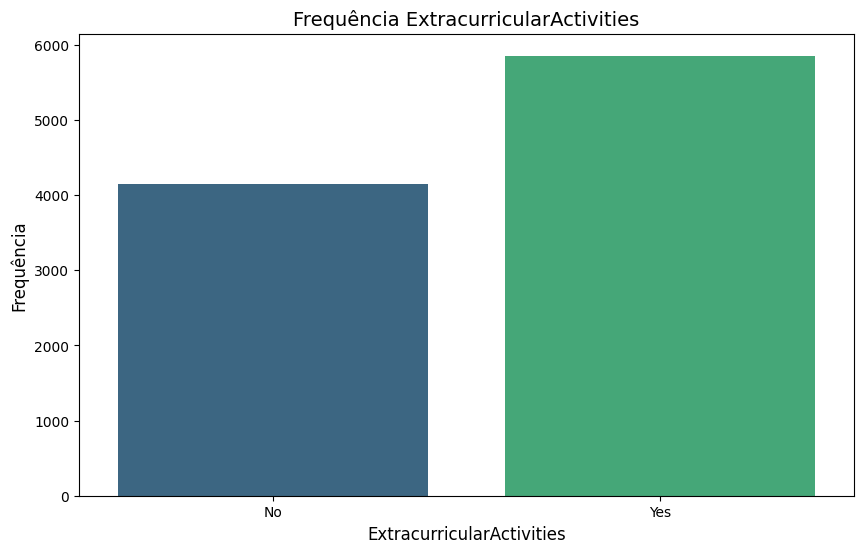

Frequências de ExtracurricularActivities:
ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64




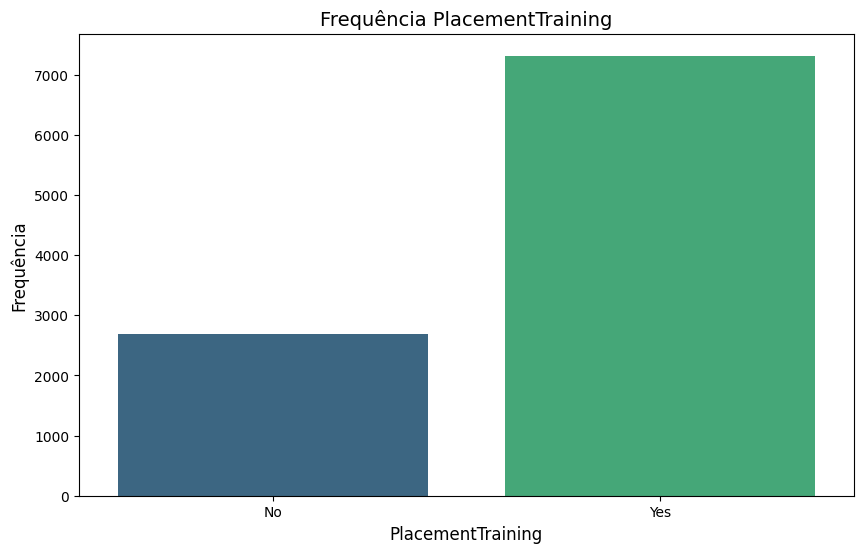

Frequências de PlacementTraining:
PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64




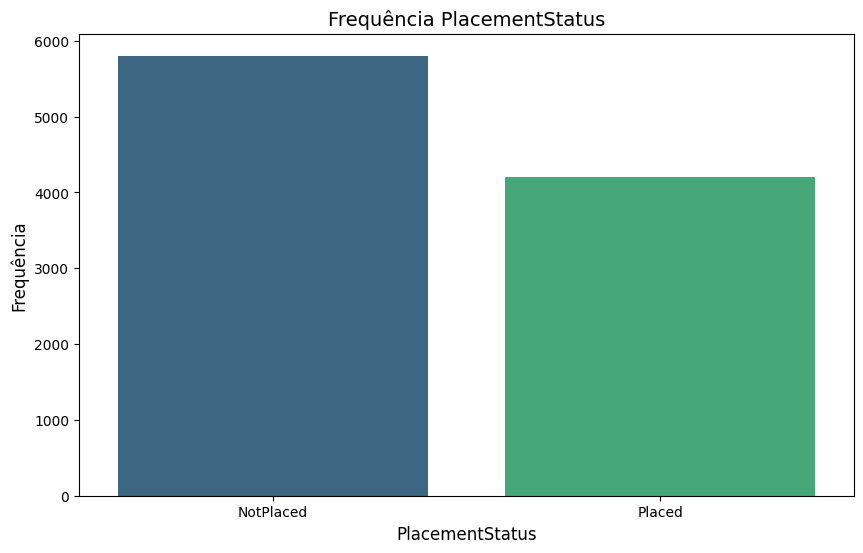

Frequências de PlacementStatus:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64




In [8]:
# Verificar as frequências das colunas categóricas
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
for col in categorical_columns:
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frequência {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()
    #Apresenta os dados
    print(f"Frequências de {col}:")
    print(df[col].value_counts())
    print("\n")

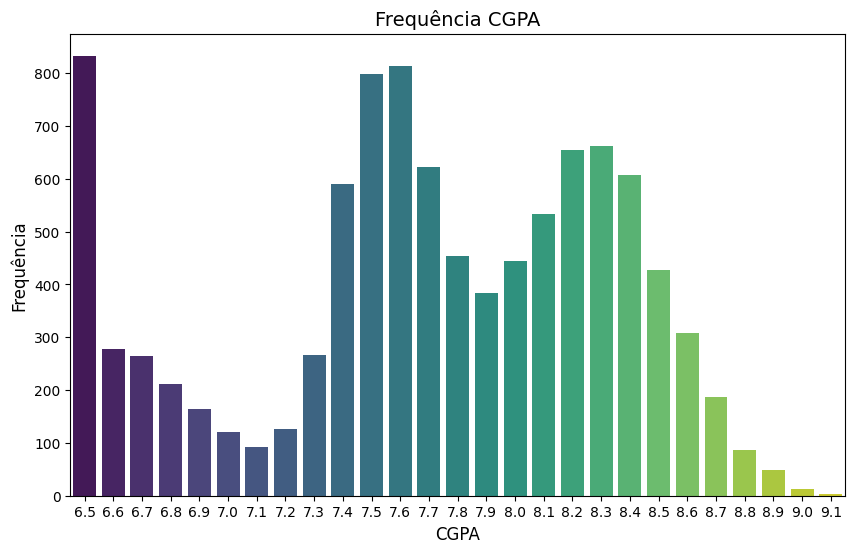

Distribuição de CGPA:
count    10000.000000
mean         7.698010
std          0.640131
min          6.500000
25%          7.400000
50%          7.700000
75%          8.200000
max          9.100000
Name: CGPA, dtype: float64
Distribuição da frequência de CGPA:
CGPA
6.5    833
7.6    814
7.5    798
8.3    662
8.2    655
7.7    622
8.4    608
7.4    590
8.1    534
7.8    453
8.0    445
8.5    428
7.9    384
8.6    309
6.6    278
7.3    267
6.7    265
6.8    212
8.7    187
6.9    165
7.2    127
7.0    121
7.1     92
8.8     86
8.9     49
9.0     13
9.1      3
Name: count, dtype: int64




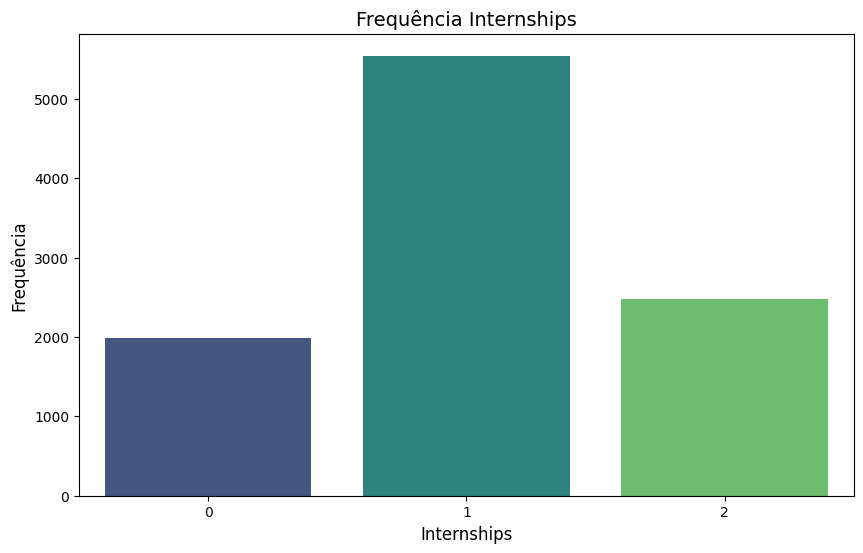

Distribuição de Internships:
count    10000.000000
mean         1.049200
std          0.665901
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Internships, dtype: float64
Distribuição da frequência de Internships:
Internships
1    5542
2    2475
0    1983
Name: count, dtype: int64




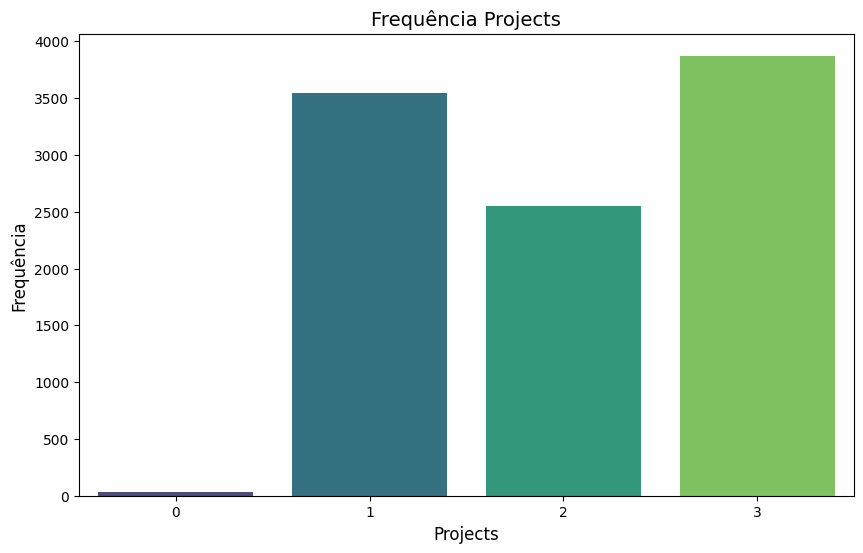

Distribuição de Projects:
count    10000.000000
mean         2.026600
std          0.867968
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Projects, dtype: float64
Distribuição da frequência de Projects:
Projects
3    3873
1    3547
2    2550
0      30
Name: count, dtype: int64




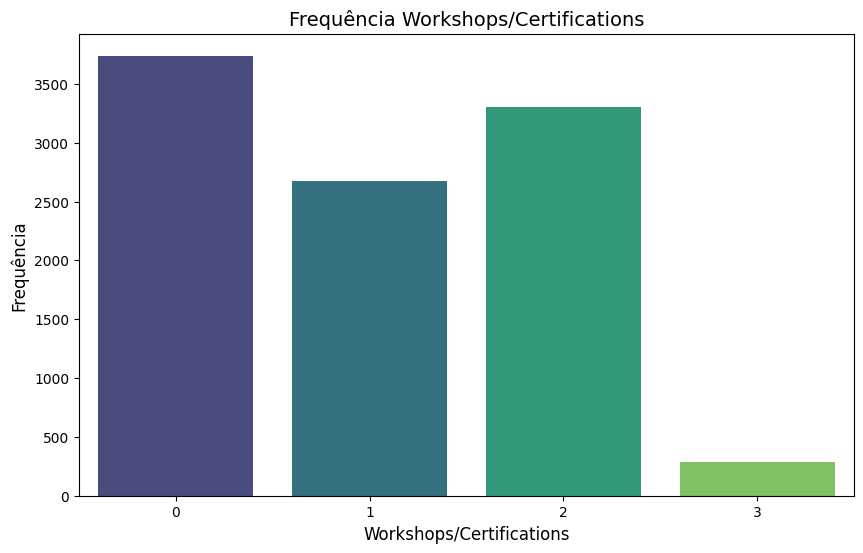

Distribuição de Workshops/Certifications:
count    10000.000000
mean         1.013200
std          0.904272
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Workshops/Certifications, dtype: float64
Distribuição da frequência de Workshops/Certifications:
Workshops/Certifications
0    3739
2    3303
1    2674
3     284
Name: count, dtype: int64




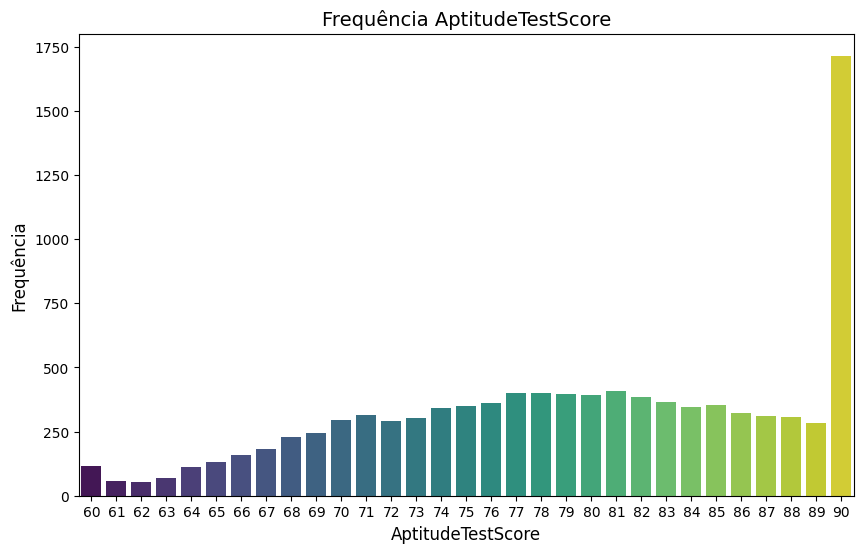

Distribuição de AptitudeTestScore:
count    10000.000000
mean        79.449900
std          8.159997
min         60.000000
25%         73.000000
50%         80.000000
75%         87.000000
max         90.000000
Name: AptitudeTestScore, dtype: float64
Distribuição da frequência de AptitudeTestScore:
AptitudeTestScore
90    1715
81     409
78     402
77     399
79     396
80     392
82     383
83     367
76     363
85     355
75     348
84     344
74     343
86     324
71     316
87     312
88     306
73     301
70     295
72     290
89     285
69     245
68     229
67     184
66     158
65     131
60     116
64     113
63      69
61      58
62      52
Name: count, dtype: int64




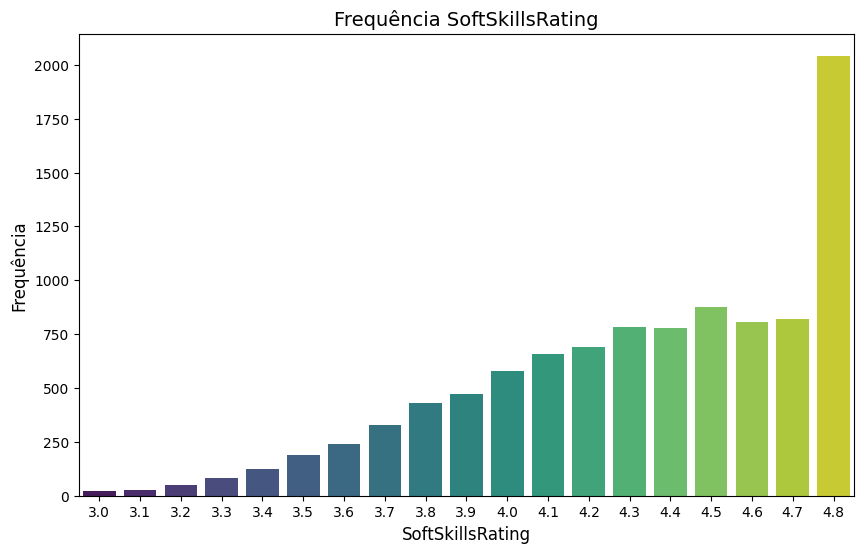

Distribuição de SoftSkillsRating:
count    10000.000000
mean         4.323960
std          0.411622
min          3.000000
25%          4.000000
50%          4.400000
75%          4.700000
max          4.800000
Name: SoftSkillsRating, dtype: float64
Distribuição da frequência de SoftSkillsRating:
SoftSkillsRating
4.8    2042
4.5     876
4.7     821
4.6     805
4.3     783
4.4     777
4.2     692
4.1     659
4.0     579
3.9     472
3.8     432
3.7     329
3.6     241
3.5     187
3.4     125
3.3      83
3.2      49
3.1      28
3.0      20
Name: count, dtype: int64




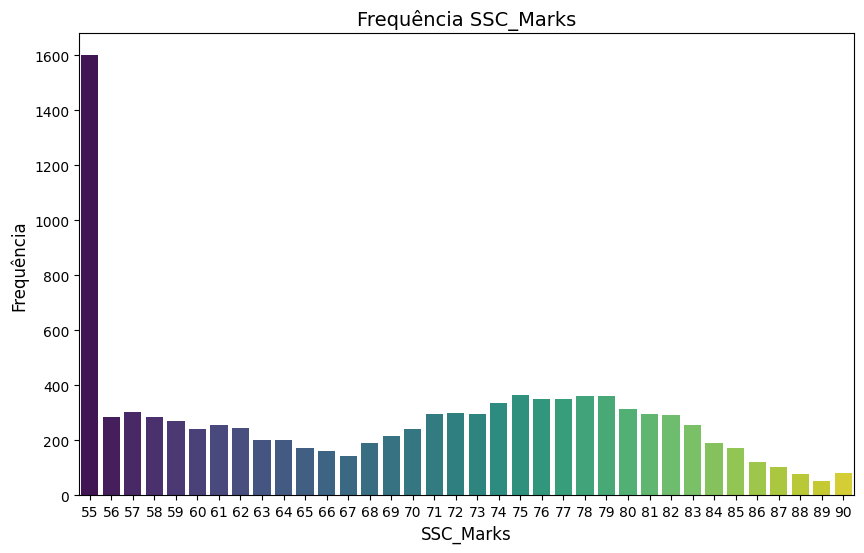

Distribuição de SSC_Marks:
count    10000.000000
mean        69.159400
std         10.430459
min         55.000000
25%         59.000000
50%         70.000000
75%         78.000000
max         90.000000
Name: SSC_Marks, dtype: float64
Distribuição da frequência de SSC_Marks:
SSC_Marks
55    1600
75     364
79     363
78     360
77     352
76     350
74     336
80     314
57     302
72     301
73     298
71     298
81     296
82     294
56     287
58     287
59     272
61     258
83     255
62     246
70     243
60     241
69     215
63     202
64     200
68     192
84     190
65     173
85     171
66     161
67     144
86     121
87     104
90      80
88      79
89      51
Name: count, dtype: int64




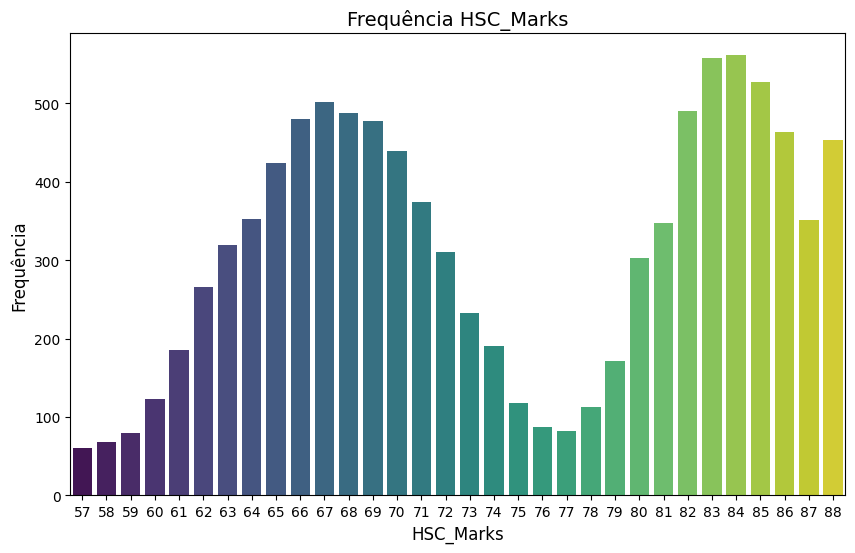

Distribuição de HSC_Marks:
count    10000.000000
mean        74.501500
std          8.919527
min         57.000000
25%         67.000000
50%         73.000000
75%         83.000000
max         88.000000
Name: HSC_Marks, dtype: float64
Distribuição da frequência de HSC_Marks:
HSC_Marks
84    561
83    558
85    527
67    502
82    490
68    488
66    480
69    478
86    463
88    453
70    439
65    424
71    374
64    353
87    351
81    348
63    319
72    311
80    303
62    266
73    232
74    191
61    186
79    172
60    123
75    118
78    113
76     87
77     82
59     80
58     68
57     60
Name: count, dtype: int64




In [9]:
# Verificar as distribuições das colunas numéricas
numerical_columns = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
for col in numerical_columns:
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frequência {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()
    print(f"Distribuição de {col}:")
    print(df[col].describe())
    print(f"Distribuição da frequência de {col}:")
    print(df[col].value_counts())
    print("\n")

# ML

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer

In [11]:
# Aplicamos para todas as colunas categóricas no dataset
le = LabelEncoder()

for coluna in categorical_columns:
    df[coluna] = le.fit_transform(df[coluna])

In [12]:
# Separar as features (X) e o alvo (y)
X = df.drop('PlacementStatus', axis=1)  # Features (todas as colunas, exceto 'rangetype')
y = df['PlacementStatus']  # Variável alvo (rangetype)

# Dividir os dados em treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Definir a grade de parâmetros para o GridSearch
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Definir a grade de parâmetros para o GridSearch
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Definir a grade de parâmetros para o GridSearch
param_grid_lgb = {
    'lgb__n_estimators': [100, 200],
    'lgb__max_depth': [10, 20],
    'lgb__learning_rate': [0.01, 0.1],
    'lgb__num_leaves': [31, 50],
    'lgb__subsample': [0.8, 1.0]
}

# Definir a grade de parâmetros para o GridSearch
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [14]:
# 1. Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('rf', RandomForestClassifier(random_state=42))
])
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros Random Forest: {grid_search_rf.best_params_}")
y_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros Random Forest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Acurácia do modelo Random Forest: 0.785


In [15]:
# Passo 1: Recuperar os melhores parâmetros do GridSearch
melhores_parametros_rf = grid_search_rf.best_params_

# Passo 2: Remover o prefixo "rf__"
melhores_parametros_rf = {k.split('__')[1]: v for k, v in melhores_parametros_rf.items()}

# Passo 3: Criar o modelo com os melhores parâmetros
modelo_rf_final = RandomForestClassifier(**melhores_parametros_rf, random_state=42)

# Passo 4: Aplicar Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds de validação cruzada
scores = cross_val_score(modelo_rf_final, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# Passo 5: Exibir os resultados da Cross-Validation
print(f"Acurácia média do modelo Random Forest (CV): {scores.mean()}")
print(f"Desvio padrão da acurácia: {scores.std()}")

Acurácia média do modelo Random Forest (CV): 0.7952
Desvio padrão da acurácia: 0.006874590896918871


In [16]:
# 2. XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('xgb', xgb.XGBClassifier(random_state=42))
])
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros XGBoost: {grid_search_xgb.best_params_}")
y_pred_xgb = grid_search_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do modelo XGBoost: {accuracy_xgb}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros XGBoost: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Acurácia do modelo XGBoost: 0.794


In [17]:
# Passo 1: Recuperar os melhores parâmetros do GridSearch
melhores_parametros_xgb = grid_search_xgb.best_params_

# Passo 2: Remover o prefixo "xgb__"
melhores_parametros_xgb = {k.split('__')[1]: v for k, v in melhores_parametros_xgb.items()}

# Passo 3: Criar o modelo com os melhores parâmetros
modelo_xgb_final = xgb.XGBClassifier(**melhores_parametros_xgb, random_state=42)

# Passo 4: Aplicar Cross-Validation
scores_xgb = cross_val_score(modelo_xgb_final, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# Passo 5: Exibir os resultados
print(f"Acurácia média do modelo XGBoost (CV): {scores_xgb.mean()}")
print(f"Desvio padrão da acurácia: {scores_xgb.std()}")



Acurácia média do modelo XGBoost (CV): 0.7980000000000002
Desvio padrão da acurácia: 0.005932958789676535


In [18]:
# 3. LightGBM
pipeline_lgb = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('lgb', lgb.LGBMClassifier(random_state=42))
])
grid_search_lgb = GridSearchCV(pipeline_lgb, param_grid_lgb, cv=5, n_jobs=-1, verbose=2)
grid_search_lgb.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros LightGBM: {grid_search_lgb.best_params_}")
y_pred_lgb = grid_search_lgb.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Acurácia do modelo LightGBM: {accuracy_lgb}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Number of positive: 3369, number of negative: 4631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421125 -> initscore=-0.318157
[LightGBM] [Info] Start training from score -0.318157
Melhores parâmetros LightGBM: {'lgb__learning_rate': 0.01, 'lgb__max_depth': 10, 'lgb__n_estimators': 200, 'lgb__num_leaves': 31, 'lgb__subsample': 0.8}
Acurácia do modelo LightGBM: 0.7905


In [19]:
# Passo 1: Recuperar os melhores parâmetros do GridSearch
melhores_parametros_lgb = grid_search_lgb.best_params_

# Passo 2: Remover o prefixo "lgb__"
melhores_parametros_lgb = {k.split('__')[1]: v for k, v in melhores_parametros_lgb.items()}

# Passo 3: Criar o modelo com os melhores parâmetros
modelo_lgb_final = lgb.LGBMClassifier(**melhores_parametros_lgb, random_state=42)

# Passo 4: Aplicar Cross-Validation
scores_lgb = cross_val_score(modelo_lgb_final, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# Passo 5: Exibir os resultados
print(f"Acurácia média do modelo LightGBM (CV): {scores_lgb.mean()}")
print(f"Desvio padrão da acurácia: {scores_lgb.std()}")


Acurácia média do modelo LightGBM (CV): 0.7968
Desvio padrão da acurácia: 0.007833262411026463


In [20]:
# 4. K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Normalização
    ('knn', KNeighborsClassifier())
])
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros KNN: {grid_search_knn.best_params_}")
y_pred_knn = grid_search_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do modelo KNN: {accuracy_knn}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros KNN: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Acurácia do modelo KNN: 0.78


In [21]:
# Passo 1: Recuperar os melhores parâmetros
melhores_parametros_knn = grid_search_knn.best_params_

# Passo 2: Remover prefixo
melhores_parametros_knn = {k.split('__')[1]: v for k, v in melhores_parametros_knn.items()}

# Passo 3: Criar o modelo com os melhores parâmetros
modelo_knn_final = KNeighborsClassifier(**melhores_parametros_knn)

# Passo 4: Definir a estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Passo 5: Aplicar Cross-Validation
scores_knn = cross_val_score(modelo_knn_final, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# Passo 6: Exibir os resultados
print(f"Acurácia média do modelo KNN (CV): {scores_knn.mean()}")
print(f"Desvio padrão da acurácia: {scores_knn.std()}")

Acurácia média do modelo KNN (CV): 0.7667999999999999
Desvio padrão da acurácia: 0.005853204250664756
